<a href="https://colab.research.google.com/github/B-Lina/FundamentosRedesNeuronales/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def datosEntrada(archivo):

  with open(archivo, "r") as f:
      lineas = f.readlines()

  datosEntrenamiento = []

  for linea in lineas:
      inicio = linea.find("{")
      fin = linea.find("}")
      if inicio != -1 and fin != -1:
          bloque = linea[inicio+1:fin]

          fila = [v.strip() for v in bloque.split(",") if v.strip()]

          fila = [int(v, 16) for v in fila]

          bits = []
          for valor in fila:
              b = format(valor, "05b")
              bits.extend(int(x) for x in b)

          if len(bits) == 35:
              datosEntrenamiento.append(bits)

  datosEntrenamiento = np.array(datosEntrenamiento)

  return datosEntrenamiento

In [ ]:
def CalcularError(salidaEntrenamiento, oTotal):
  error = 0.5 * np.sum((salidaEntrenamiento - oTotal) ** 2)
  return error

def funcionSigmoid(h):
    return 1 / (1 + np.exp(-h))

def sigmoidDerivada(h):
    s = funcionSigmoid(h)
    return s * (1 - s)

def relu(h):
    return np.maximum(0, h)

def reluDerivada(h):
    return (h > 0).astype(float)

In [ ]:
def pesosCapas():
    matrices = [(20,35), (10,20), (20,10), (35,20)]
    return [np.random.uniform(-0.05, 0.05, m) for m in matrices]

In [ ]:
def multicapa(tasaAprendizaje, pesosCapas, entrada, epocas=10000, error=0):
    epoca = 0
    errorTotal = 1.0
    errorMin = np.inf
    mejoresPesos = [p.copy() for p in pesosCapas]

    while errorTotal > error and epoca < epocas:
        errorTotal = 0

        for x in entrada:
            activaciones = [x]
            for i, w in enumerate(pesosCapas):
              h = np.dot(activaciones[-1], w.T)
              if i == len(pesosCapas) - 1:
                 activaciones.append(funcionSigmoid(h))
              else:
                 activaciones.append(relu(h))

            salidaFinal = activaciones[-1]

            delta = (x - salidaFinal) * sigmoidDerivada(salidaFinal)
            errorTotal += CalcularError(x, salidaFinal)

            deltas = [delta]
            for i in reversed(range(len(pesosCapas) - 1)):
              h = activaciones[i+1]
              delta = np.dot(deltas[0], pesosCapas[i+1]) * reluDerivada(h)
              deltas.insert(0, delta)

            for i in range(len(pesosCapas)):
                pesosCapas[i] += tasaAprendizaje * np.outer(deltas[i], activaciones[i])

        if errorTotal < errorMin:
            errorMin = errorTotal
            mejoresPesos = [p.copy() for p in pesosCapas]

        epoca += 1
        if epoca % 100 == 0:

            print(f"Época {epoca}, Error total = {errorTotal}")

    print("\nEntrenamiento finalizado")
    print("Error mínimo alcanzado:", errorMin)
    return mejoresPesos

In [ ]:
entrada = datosEntrada("/Conjunto de entrada.txt")
entrada = entrada.astype(float)
pesos = pesosCapas()

pesosEntrenados = multicapa(0.01, pesos, entrada)

Época 100, Error total = 139.999614
Época 200, Error total = 139.998858
Época 300, Error total = 139.997505
Época 400, Error total = 139.993130
Época 500, Error total = 139.948387
Época 600, Error total = 106.046546
Época 700, Error total = 103.386017
Época 800, Error total = 102.802829
Época 900, Error total = 102.801723
Época 1000, Error total = 102.780555
Época 1100, Error total = 102.744541
Época 1200, Error total = 102.703361
Época 1300, Error total = 102.798560
Época 1400, Error total = 102.637369
Época 1500, Error total = 102.630161
Época 1600, Error total = 102.636287
Época 1700, Error total = 102.587700
Época 1800, Error total = 102.151573
Época 1900, Error total = 83.136601
Época 2000, Error total = 80.703711
Época 2100, Error total = 71.227934
Época 2200, Error total = 63.340253
Época 2300, Error total = 54.421253
Época 2400, Error total = 42.117051
Época 2500, Error total = 30.022924
Época 2600, Error total = 19.823842
Época 2700, Error total = 11.532598
Época 2800, Error t

In [ ]:
def reconstruir(x, pesos):
    a = x
    for i, w in enumerate(pesos):
        h = np.dot(a, w.T)
        if i == len(pesos) - 1:
            a = funcionSigmoid(h)
        else:
            a = relu(h)
    return a

original = entrada[14]
reconstruido = reconstruir(original, pesosEntrenados)
print("Original:     ", original)
print("Reconstruido: ", np.round(reconstruido))

Original:      [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.]
Reconstruido:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.]


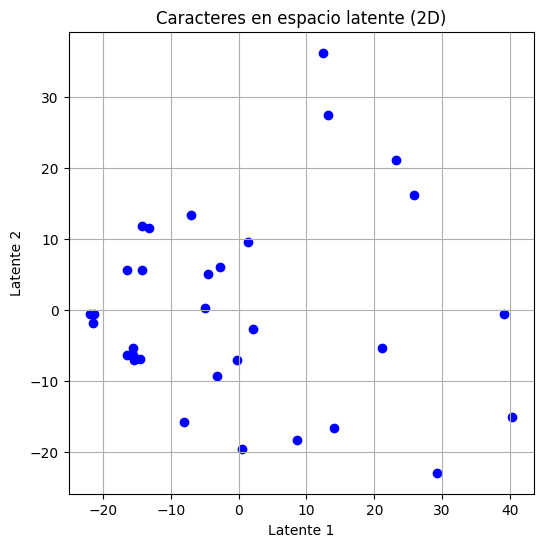

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

latentes = []
for x in entrada:
    activaciones = [x]
    h1 = relu(np.dot(x, pesosEntrenados[0].T))
    h2 = relu(np.dot(h1, pesosEntrenados[1].T))
    latentes.append(h2)

latentes = np.array(latentes)

pca = PCA(n_components=2)
latentes2D = pca.fit_transform(latentes)

plt.figure(figsize=(6,6))
plt.scatter(latentes2D[:,0], latentes2D[:,1], c='blue')
plt.title("Caracteres en espacio latente (2D)")
plt.xlabel("Latente 1")
plt.ylabel("Latente 2")
plt.grid(True)
plt.show()

Caracter en 7x5:
0 0 0 0 0
0 1 1 0 0
0 1 1 0 0
0 0 0 0 0
0 1 1 0 0
0 1 1 0 0
0 0 0 1 0


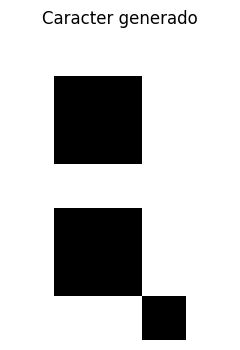

In [ ]:
def nuevoLatente():
    nuevoLatente = np.random.uniform(-1, 1, size=(10,))

    h_dec1 = relu(np.dot(nuevoLatente, pesosEntrenados[2].T))
    salida = funcionSigmoid(np.dot(h_dec1, pesosEntrenados[3].T))

    nuevoCaracter = np.round(salida)
    return nuevoCaracter

def mostrarCaracter(bits):
    matriz = bits.reshape((7,5))

    print("Caracter en 7x5:")
    for fila in matriz:
        print(" ".join(str(int(b)) for b in fila))

    plt.figure(figsize=(3,4))
    plt.imshow(matriz, cmap='Greys', interpolation='nearest')
    plt.title("Caracter generado")
    plt.axis('off')
    plt.show()

caracter = nuevoLatente()

mostrarCaracter(caracter)

In [ ]:
def agregarRuido(x, prob):
    xRuido = x.copy()
    mask = np.random.rand(*x.shape) < prob
    xRuido[mask] = 1 - xRuido[mask]
    return xRuido

In [ ]:
def calcularErrorRuido(x, salidaFinal):
    epsilon = 1e-12
    salidaFinal = np.clip(salidaFinal, epsilon, 1 - epsilon)
    return -np.sum(x * np.log(salidaFinal) + (1 - x) * np.log(1 - salidaFinal))

In [ ]:
def tanh(h):
    return np.tanh(h)

def tanhDerivada(t):
    # t ya es tanh(h)
    return 1 - t**2

In [ ]:
def pesosCapasRuido():
    matrices = [(50,35), (45,50), (40,45),(45,40), (50,45), (35,50)]
    pesos = []
    for fan_out, fan_in in matrices:
        lim = np.sqrt(6 / (fan_in + fan_out))
        w = np.random.uniform(-lim, lim, (fan_out, fan_in))
        pesos.append(w)
    return pesos

In [ ]:
def multicapaRuido(tasaAprendizaje, pesosCapas, entrada, epocas=30000, error=1e-4, ruido=0.1):
    epoca = 0
    errorMin = np.inf
    mejoresPesos = [p.copy() for p in pesosCapas]

    while epoca < epocas:
        errorTotal = 0

        for x in entrada:
            xRuido = agregarRuido(x, ruido)

            activaciones = [xRuido]
            for i, w in enumerate(pesosCapas):
                h = np.dot(activaciones[-1], w.T)
                if i == len(pesosCapas) - 1:
                    activaciones.append(funcionSigmoid(h))
                else:
                    activaciones.append(tanh(h))

            salidaFinal = activaciones[-1]

            delta = salidaFinal - x

            errorTotal += calcularErrorRuido(x, salidaFinal)

            deltas = [delta]
            delta_sig = delta
            for i in reversed(range(len(pesosCapas) - 1)):
                delta = np.dot(delta_sig, pesosCapas[i+1]) * tanhDerivada(activaciones[i+1])
                delta = np.clip(delta, -1, 1)
                deltas.insert(0, delta)
                delta_sig = delta


            for i in range(len(pesosCapas)):
                pesosCapas[i] -= tasaAprendizaje * np.outer(deltas[i], activaciones[i])

        if errorTotal < errorMin:
            errorMin = errorTotal
            mejoresPesos = [p.copy() for p in pesosCapas]

        epoca += 1
        if epoca % 100 == 0:
            print(f"Época {epoca}, Error total = {errorTotal:.6f}")

        if errorTotal < error:
            break

    print("\nEntrenamiento finalizado")
    print("Error mínimo alcanzado:", errorMin)
    return mejoresPesos

In [ ]:
def mostrarCaracter(bits, titulo="Caracter"):
    matriz = bits.reshape((7,5))
    plt.imshow(matriz, cmap="Greys", interpolation="nearest")
    plt.title(titulo)
    plt.axis("off")

def mostrarRuido(num, prob):
    original = entrada[num]
    ruido = agregarRuido(original, prob)

    h1 = relu(np.dot(ruido, pesosEntrenados[0].T))
    h2 = relu(np.dot(h1, pesosEntrenados[1].T))
    h3 = relu(np.dot(h2, pesosEntrenados[2].T))
    reconstruido = funcionSigmoid(np.dot(h3, pesosEntrenados[3].T))
    reconstruido = np.round(reconstruido)

    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    mostrarCaracter(original, "Original")

    plt.subplot(1,3,2)
    mostrarCaracter(ruido, "Con ruido")

    plt.subplot(1,3,3)
    mostrarCaracter(reconstruido, "Reconstruido")

    plt.show()

In [ ]:
entrada = datosEntrada("/Conjunto de entrada.txt")
entrada = entrada / 1.0
pesos = pesosCapasRuido()

pesos_entrenados = multicapaRuido(0.001, pesos, entrada)

mostrarRuido(9, 0.1)

Época 100, Error total = 444.793126


KeyboardInterrupt: 

In [ ]:
import re

def datosDibujo(archivo):
    with open(archivo, "r") as f:
        contenido = f.read()

    bloques = re.findall(r"\{([^}]*)\}", contenido)

    datosEntrenamiento = []

    for bloque in bloques:
        numeros = re.findall(r"[01]", bloque)
        if numeros:
            bits = [int(n) for n in numeros]
            if len(bits) == 49:
                datosEntrenamiento.append(bits)

    return np.array(datosEntrenamiento, dtype=float)

In [ ]:
def pesosCapasDibujo():
    matrices = [(40,49), (20,40), (40,20), (49,40)]
    return [np.random.uniform(-0.05, 0.05, m) for m in matrices]

In [ ]:
entrada = datosDibujo("/ee.txt")
entrada = entrada.astype(float)

pesos = pesosCapasDibujo()

pesosEntrenadosDibujos = multicapa(0.005, pesos, entrada)

Época 100, Error total = 36.74931018482866
Época 200, Error total = 36.74871111553243
Época 300, Error total = 36.747970096341405
Época 400, Error total = 36.746889506038
Época 500, Error total = 36.74512737206205
Época 600, Error total = 36.741819131200685
Época 700, Error total = 36.73424456773327
Época 800, Error total = 36.70861664121444
Época 900, Error total = 36.47030374207415
Época 1000, Error total = 25.49838811219596
Época 1100, Error total = 24.475007883031225
Época 1200, Error total = 24.370970447081277
Época 1300, Error total = 24.234084361189595
Época 1400, Error total = 24.079211007244226
Época 1500, Error total = 23.8778152322564
Época 1600, Error total = 23.61722578790061
Época 1700, Error total = 23.376799128191532
Época 1800, Error total = 23.18618293211501
Época 1900, Error total = 23.030437811309127
Época 2000, Error total = 22.909547739068955
Época 2100, Error total = 22.81708289341654
Época 2200, Error total = 22.744117597567758
Época 2300, Error total = 22.68526

In [ ]:
import matplotlib.pyplot as plt

def mostrarDibujo(bits, titulo="Dibujo"):
    matriz = bits.reshape((7,7))
    plt.imshow(matriz, cmap="Greys", interpolation="nearest")
    plt.title(titulo)
    plt.axis("off")

def mostrarReconstruccion(indice, pesosEntrenados, entrada):
    x = entrada[indice]

    activacion = x
    for i, w in enumerate(pesosEntrenados):
        h = np.dot(activacion, w.T)
        if i == len(pesosEntrenados) - 1:
            activacion = 1 / (1 + np.exp(-h))
        else:
            activacion = np.tanh(h)

    reconstruido = np.round(activacion)

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    mostrarDibujo(x, "Original")
    plt.subplot(1,2,2)
    mostrarDibujo(reconstruido, "Reconstruido")
    plt.show()

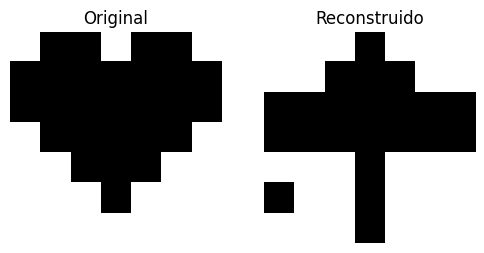

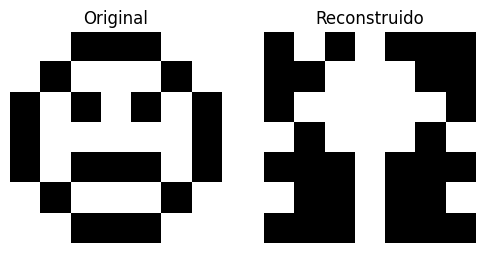

In [ ]:
mostrarReconstruccion(0, pesosEntrenadosDibujos, entrada)
mostrarReconstruccion(3, pesosEntrenadosDibujos, entrada)

In [ ]:
def generarNuevo(pesosEntrenados, cantidad=3):
    tamañoCodigo = pesosEntrenados[len(pesosEntrenados)//2 - 1].shape[0]

    for i in range(cantidad):
        codigo = np.random.uniform(-1, 1, tamañoCodigo)
        activacion = codigo

        for w in pesosEntrenados[len(pesosEntrenados)//2:]:
            h = np.dot(activacion, w.T)
            activacion = 1 / (1 + np.exp(-h))

        nuevo = np.round(activacion)
        mostrarDibujo(nuevo, f"Nuevo dibujo {i+1}")

    plt.show()

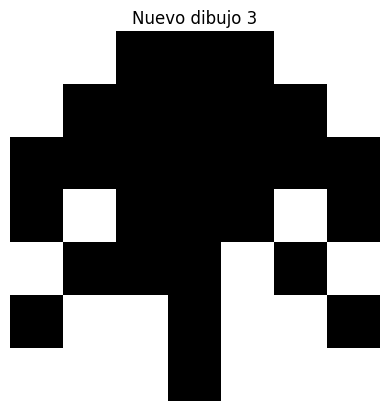

In [ ]:
generarNuevo(pesosEntrenadosDibujos)

In [ ]:
#Autoencoder con Keras, carga de datos

from tensorflow.keras import Input, Model
from tensorflow.keras.layers import  Dense, Dropout, BatchNormalization
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU

def datosEntrada(archivo):

  with open(archivo, "r") as f:
      lineas = f.readlines()

  datosEntrenamiento = []

  for linea in lineas:
      inicio = linea.find("{")
      fin = linea.find("}")
      if inicio != -1 and fin != -1:
          bloque = linea[inicio+1:fin]

          fila = [v.strip() for v in bloque.split(",") if v.strip()]

          fila = [int(v, 16) for v in fila]

          bits = []
          for valor in fila:
              b = format(valor, "05b")
              bits.extend(int(x) for x in b)

          if len(bits) == 35:
              datosEntrenamiento.append(bits)

  datosEntrenamiento = np.array(datosEntrenamiento)

  return datosEntrenamiento

entrada = datosEntrada("/ee.txt")
salida = entrada

X_flat = entrada.astype(np.float32)
X_Pruebas_flat = salida.astype(np.float32)

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 - 5s - 1s/step - loss: 1.3677 - mae: 0.9957 - val_loss: 1.3375 - val_mae: 1.0536 - learning_rate: 1.0000e-03
Epoch 2/500
4/4 - 0s - 25ms/step - loss: 1.3564 - mae: 0.9929 - val_loss: 1.3358 - val_mae: 1.0496 - learning_rate: 1.0000e-03
Epoch 3/500
4/4 - 0s - 28ms/step - loss: 1.2874 - mae: 0.9659 - val_loss: 1.3301 - val_mae: 1.0449 - learning_rate: 1.0000e-03
Epoch 4/500
4/4 - 0s - 26ms/step - loss: 1.2260 - mae: 0.9427 - val_loss: 1.3228 - val_mae: 1.0399 - learning_rate: 1.0000e-03
Epoch 5/500
4/4 - 0s - 26ms/step - loss: 1.2129 - mae: 0.9306 - val_loss: 1.3150 - val_mae: 1.0344 - learning_rate: 1.0000e-03
Epoch 6/500
4/4 - 0s - 25ms/step - loss: 1.1753 - mae: 0.9251 - val_loss: 1.3050 - val_mae: 1.0306 - learning_rate: 1.0000e-03
Epoch 7/500
4/4 - 0s - 25ms/step - loss: 1.1357 - mae: 0.8985 - val_loss: 1.2840 - val_mae: 1.0240 - learning_rate: 1.0000e-03
Epoch 8/500
4/4 - 0s - 26ms/step - loss: 1.1792 - mae: 0.9336 - val_loss: 1.2620 - val_mae: 1.0170 - learning_rate: 1.0000e-0

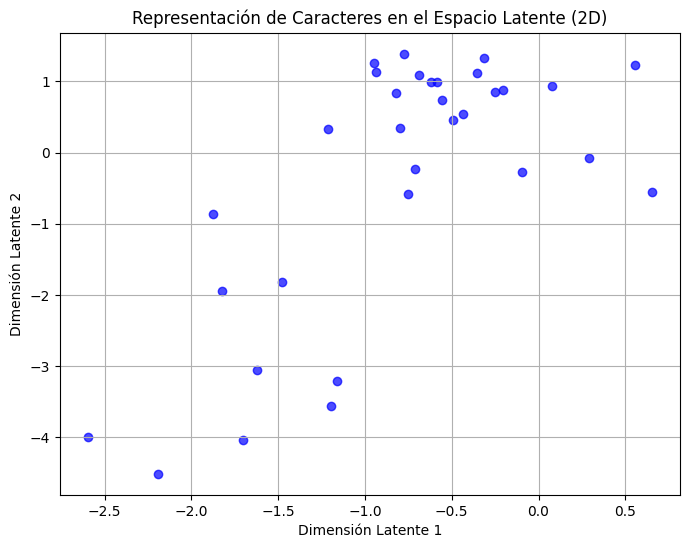

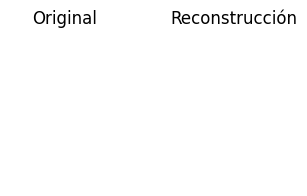

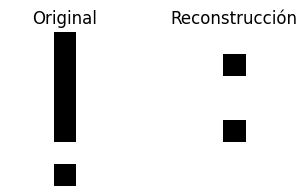

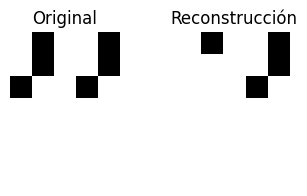

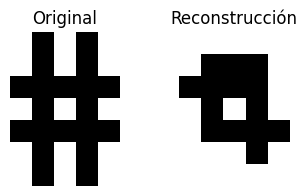

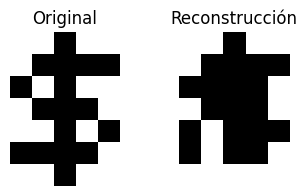

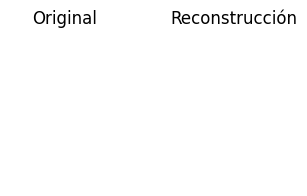

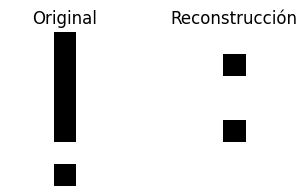

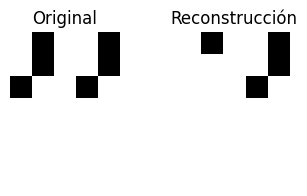

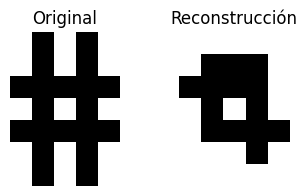

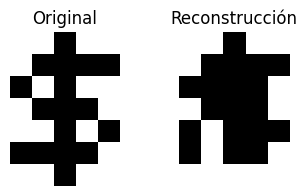

In [ ]:
X_scaled = X_flat * 2 - 1
X_test_scaled = X_Pruebas_flat * 2 - 1

def construirAutoencoderSimple(inputDim=35, latentDim=2):

    inp = Input(shape=(inputDim,), name='input_layer')

    x = Dense(35, kernel_initializer='he_normal')(inp)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)

    x = Dense(32, kernel_initializer='he_normal')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)

    x = Dense(16, kernel_initializer='he_normal')(x)
    x = LeakyReLU(alpha=0.1)(x)

    latent = Dense(latentDim, activation='linear', name='capa_latente')(x)


    y = Dense(16, kernel_initializer='he_normal')(latent)
    y = LeakyReLU(alpha=0.1)(y)
    y = BatchNormalization()(y)

    y = Dense(32, kernel_initializer='he_normal')(y)
    y = LeakyReLU(alpha=0.1)(y)
    y = BatchNormalization()(y)

    y = Dense(35, kernel_initializer='he_normal')(y)
    y = LeakyReLU(alpha=0.1)(y)
    y = BatchNormalization()(y)

    out = Dense(inputDim, activation='tanh', name='output')(y)

    autoenc = Model(inputs=inp, outputs=out, name='autoencoder')
    enc = Model(inputs=inp, outputs=latent, name='encoder')
    return autoenc, enc

autoencoder, encoder = construirAutoencoderSimple(35, 2)

autoencoder.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=1)
]

history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=500,
    batch_size=8,
    validation_split=0.1,
    callbacks=callbacks,
    shuffle=True,
    verbose=2
)

pred_scaled_train = autoencoder.predict(X_scaled)
pred_train = (pred_scaled_train + 1)/2

pred_scaled_test = autoencoder.predict(X_test_scaled)
pred_test = (pred_scaled_test + 1)/2

mae_train = np.mean(np.abs(X_flat - pred_train))
pixel_acc_train = np.mean((np.round(pred_train) == X_flat))
print(f"MAE train: {mae_train:.4f}  -  Pixel acc train: {pixel_acc_train:.4f}")

mae_test = np.mean(np.abs(X_Pruebas_flat - pred_test))
pixel_acc_test = np.mean((np.round(pred_test) == X_Pruebas_flat))
print(f"MAE test: {mae_test:.4f}  -  Pixel acc test: {pixel_acc_test:.4f}")

latentes = encoder.predict(X_flat)

plt.figure(figsize=(8, 6))
plt.scatter(latentes[:, 0], latentes[:, 1], c='blue', alpha=0.7)
plt.xlabel("Dimensión Latente 1")
plt.ylabel("Dimensión Latente 2")
plt.title("Representación de Caracteres en el Espacio Latente (2D)")
plt.grid(True)
plt.show()

def mostrar_reconstruccion(idx, dataset='train'):
    if dataset == 'train':
        orig = X_flat[idx]
        pred = pred_train[idx]
    else:
        orig = X_Pruebas_flat[idx]
        pred = pred_test[idx]

    orig2d = orig.reshape((7, 5))
    pred2d = pred.reshape((7, 5))
    pred_bin = np.round(pred2d)

    umbral = 0.7
    pred_bin = (pred2d > umbral).astype(int)

    orig_invertida = 1 - orig2d
    pred_bin_invertida = 1 - pred_bin

    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(orig_invertida, cmap='gray', vmin=0, vmax=1, interpolation='nearest')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Reconstrucción")
    plt.imshow(pred_bin_invertida, cmap='gray', vmin=0, vmax=1, interpolation='nearest')
    plt.axis('off')

for i in range(min(5, X_flat.shape[0])):
    mostrar_reconstruccion(i, dataset='train')

for i in range(min(5, X_Pruebas_flat.shape[0])):
    mostrar_reconstruccion(i, dataset='test')

Epoch 1/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - BinaryAccuracy: 0.5613 - loss: 0.6760
Epoch 2/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - BinaryAccuracy: 0.6929 - loss: 0.5991
Epoch 3/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - BinaryAccuracy: 0.7133 - loss: 0.5684
Epoch 4/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - BinaryAccuracy: 0.7029 - loss: 0.5894
Epoch 5/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - BinaryAccuracy: 0.7301 - loss: 0.5536
Epoch 6/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - BinaryAccuracy: 0.7261 - loss: 0.5449
Epoch 7/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - BinaryAccuracy: 0.7257 - loss: 0.5387
Epoch 8/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - BinaryAccuracy: 0.7422 - loss: 0.5159
Epoch 9/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - BinaryAccuracy: 0.7310 - loss: 0.5222
Epoch 10/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - BinaryAccuracy: 0.7348 - loss: 0.5267
Epoch 11/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - BinaryAccuracy: 0.7616

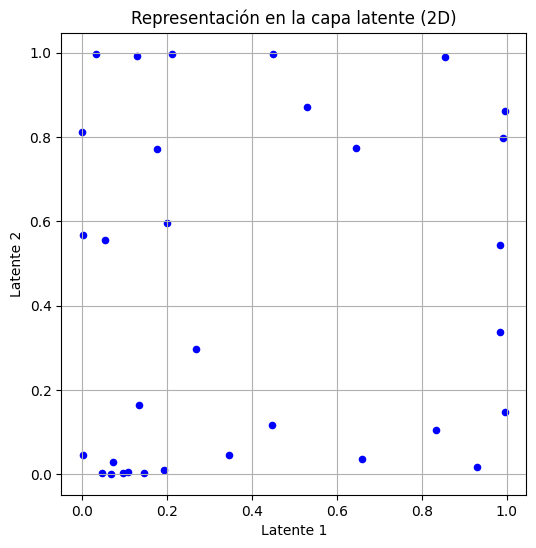

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


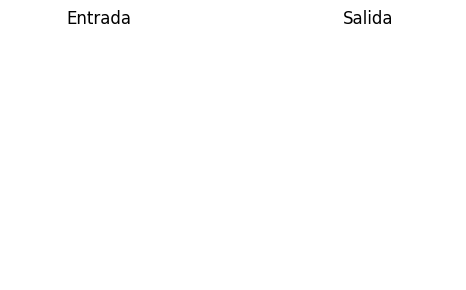

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


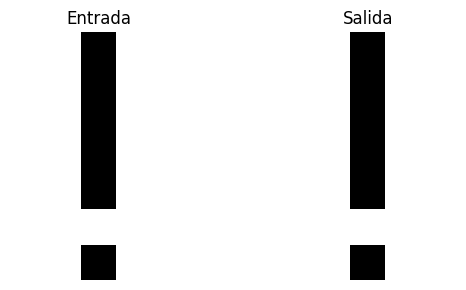

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


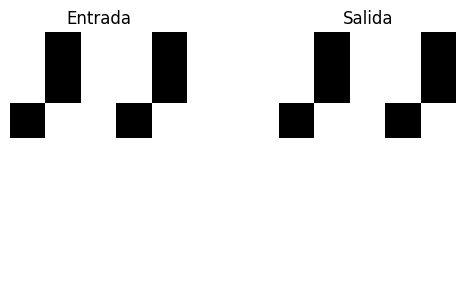

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


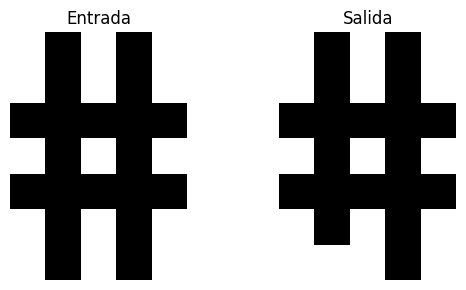

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


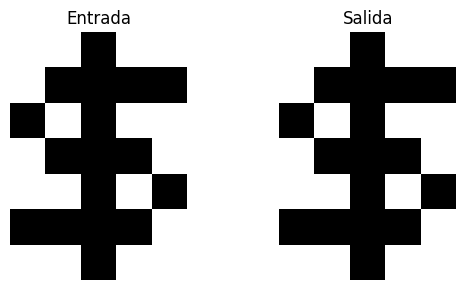

In [ ]:
#Punto 1 Autoencoder

from tensorflow.keras import layers, models, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

n = 0.008
epocas = 2000

codificador = models.Sequential([
    layers.Input(shape=(35,)),
    layers.Dense(17, activation='sigmoid'),
    layers.Dense(2, activation='sigmoid', name='latente')
])

decodificador = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(17, activation='sigmoid'),
    layers.Dense(35, activation='sigmoid')
])

autoencoder1 = models.Sequential([codificador, decodificador])
opt = optimizers.Adam(learning_rate=n)
metrica = metrics.BinaryAccuracy(name='BinaryAccuracy', threshold=0.5)

autoencoder1.compile(loss='binary_crossentropy', optimizer=opt, metrics=[metrica])
historia = autoencoder1.fit(X_flat, X_flat, epochs=epocas, batch_size=1)


puntos_latentes = codificador.predict(X_flat)

plt.figure(figsize=(6, 6))
plt.scatter(puntos_latentes[:, 0], puntos_latentes[:, 1], c='blue', s=20)
plt.title('Representación en la capa latente (2D)')
plt.xlabel('Latente 1')
plt.ylabel('Latente 2')
plt.grid(True)
plt.show()

for i in range(5):
  indice = i
  entrada = X_flat[indice]
  salida_reconstruida = autoencoder1.predict(np.array([entrada]))[0]

  entrada_img = entrada.reshape((7, 5))
  salida_img = np.round(salida_reconstruida.reshape((7, 5)))

  plt.figure(figsize=(6, 3))

  plt.subplot(1, 2, 1)
  plt.imshow(1 - entrada_img, cmap='gray', vmin=0, vmax=1)
  plt.title('Entrada')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(1 - salida_img, cmap='gray', vmin=0, vmax=1)
  plt.title('Salida')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
#Punto 2 Autoencoder con ruido

